
# The Logistic Map
***Foundations of Biological Complexity***

---


This is a _Jupyter Notebook_. It is a collection of text cells formatted in markdown, and Python code cells. It is designed for interactive exploration. "Focus" passes from cell to cell, either by placing your cursor in the next cell or pressing `Shift+Enter`. You don't have to execute markdown cells, but you do need to actively proceed past them. However, don't skip code cells; they often define variables and functions that are required later.

## Complexity

A fundamental aspect of biological systems is their unbounded ability to exhibit _interesting_ behaviour—behaviour that is neither quite predictable, nor fully random. We always find domains of order and disorder interleaved. This is not by accident: the ability to balance order and disorder, or identity and adaptation, is a defining property of life. We call such systems _complex_.

But what is a _complex system_? I define it as follows:

> **A complex system has interacting parts which collectively display emergent behaviour that is both irreducible and unpredictable.**
> 
> Behaviour is irreducible if it cannot be derived from a simple superposition of its parts.
> 
> Behaviour is unpredictable if future states cannot be fully predicted from current states, due to dynamical instability or computational undecidability.
> 
> Typically, the parts exhibit context-dependent properties, maintain persistent interactions, and form feedback loops.
>
> Such systems are generally self-describing and often adaptive.

Dynamical instability can arise through many mechanisms, but very often they involve feedback. A well-studied model of feedback is the "logistic map".

## A Model of Feedback

### Why is it called the logistic map?

The term "logistic" comes from the 19th-century mathematician Pierre François Verhulst, who proposed the logistic equation to model population growth when resources are limited. If one models this in discrete time steps (this is what we call the "logistic map") the biological interpretation is preserved: a population grows by a constant factor in each generation (this is called geometric growth) but its total size is constrained by limited resources. The word "map" refers to the mathematical concept of iterating a function over and over again: each generation is "mapped" to the next.

### The equation

The logistic map is defined by a _recurrence relation_. (This is the name we give to a function that is applied over and over again to its output at each step.):

$$x_{n+1} = r \cdot x_n \cdot (1 - x_n)$$

where:
- $x_n$ represents the population (normalized between 0 and 1) at generation $n$
- $r$ is the growth rate parameter (typically between 0 and 4)
- The term $(1 - x_n)$ represents self-limitation: as the population approaches the _carrying capacity_ of its environment, growth slows

Despite its apparent simplicity—just one parameter, one quadratic nonlinearity—this equation generates extraordinarily rich dynamics, including period-doubling, chaos, and fractal structure.

### Historical significance: Robert May's insight

The logistic map was known since the 1940s, but its profound implications for biology and dynamical systems weren't widely recognized until Robert May's landmark 1976 paper in _Nature_: "Simple mathematical models with very complicated dynamics." ([1976](https://www.nature.com/articles/261459a0)) May, an ecologist, demonstrated that even the simplest nonlinear population models could exhibit chaotic behavior—unpredictable dynamics arising from simple, deterministic rules. This was revolutionary: it showed that randomness in nature might not require external noise but could emerge from the system's own feedback structure.

May argued that scientists and students should be taught about these dynamics early, as they fundamentally challenge our intuition about predictability and control in biological and physical systems.

### Why is it significant?

The logistic map is significant for several reasons:

- **Universality**: Period-doubling routes to chaos appear across vastly different systems: fluid dynamics, electrical circuits, chemical reactions, heart rhythms, neural networks, metabolic networks, embryonal development, ... and the logistic map captures universal features of all of these.
  
- **Simplicity meets complexity**: With just one equation and one parameter, it produces the full spectrum of dynamical behaviors: fixed points, periodic oscillations, chaos, and self-similar fractal structure. This allows us to use it as a conceptual model in many fields, and ask if similar relationships exist in whatever system we might be studying.

- **Biological relevance**: It models real phenomena  — population dynamics, genetic drift, neural firing patterns — where feedback and discrete generations are fundamental.

- **Computational undecidability**: Determining long-term behavior from initial conditions can be provably impossible. This connects dynamical systems to fundamental limits of computation and knowledge.

- **The Feigenbaum constant—a universal number**: As the parameter r increases, the logistic map undergoes period-doubling bifurcations (from period 1 to 2 to 4 to 8...). The physicist Mitchell Feigenbaum discovered in 1975 that the _rate_ at which these bifurcations occur converges to a [universal constant](https://en.wikipedia.org/wiki/Feigenbaum_constants): $\delta\approx4.669...$ . Remarkably, this same constant appears in *all* one-dimensional maps with a quadratic maximum, regardless of their specific functional form. It is a universal number, and this universality reveals that there is a deep geometric structure beneath chaos. Radically different systems may follow the same route to complexity.


### Interactive exploration

In this notebook, we will introduce and explore the logistic map and compare systems with and without self-limitation, we will visualize emergence and we will see how simple feedback mechanisms can generate the kind of unpredictable, adaptive, complex behavior that characterizes living systems. Finally pose a deeper question: what's special about this map that makes it behave in this way?

---

Let's set up this notebook with the libraries we need,  in the next cell:



In [2]:
# ================================================================
# CELL 1: Import (the libraries that this notebook uses), install
#         them if they are not already available
# ================================================================

import subprocess
import sys

# Define the packages that are REQUIRED and EXTERNAL
REQUIRED_PACKAGES = ['numpy', 'matplotlib', 'tqdm', 'scipy'] 

# --- Robust Package Check and Installation for ALL External Dependencies ---

print(f"Checking for required packages: {", ".join(REQUIRED_PACKAGES)}...")

for package in REQUIRED_PACKAGES:
    try:
        # Try a standard import check
        __import__(package)
        print(f"'{package}' found.")
        
    except ImportError:
        # If import fails, install the library
        print(f"'{package}' not found. Attempting installation...")
        
        try:
            # Use subprocess to run the command in the shell
            # This is equivalent to type e.g. "python -m pip install numpy" in the terminal
            subprocess.check_call([sys.executable, "-m", "pip", "install", package])
            
            print(f"'{package}' installed successfully.")
            
        except Exception as e:
            # Catch installation errors (e.g., no internet, permission issues)
            print(f"ERROR: Could not install '{package}'. Please run 'python -m pip install {package}' manually.")
            # We can't proceed without these, so we raise an error
            raise e 

# --- Final Imports (Now that all packages are confirmed installed) ---

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from tqdm.notebook import tqdm
from scipy import signal

print("All dependencies are ready.")


#   NOTE:
#   =====
#   If anything was actually installed, then RUN THIS CELL AGAIN. Some 
#   environments require a re-run of the cell after a fresh install.
#   and for the others it will simply do nothing.


Checking for required packages: numpy, matplotlib, tqdm, scipy...
'numpy' not found. Attempting installation...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 9.5 MB/s  0:00:00 eta 0:00:01
'numpy' installed successfully.
'matplotlib' not found. Attempting installation...
  Using cached contourpy-1.3.3-cp313-cp313-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-macosx_11_0_arm64.whl.metadata (6.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 9.8 MB/s  0:00:006m0:00:0100:01
Using cached contourpy-1.3.3-cp313-cp313-macosx_11_0_arm64.whl (274 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 15.1 MB/s  0:00:00
Using cached kiwisolver-1.4.9-cp313-cp313-macosx_11_0_arm64.whl (64 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 11.0 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7

---

## The geometric map


Before exploring the logistic map, we need to clarify the nature of the stepwise iteration it describes. Let us visualize this first _without_ the self-limiting  feedback term.

$$x_{n+1} = r \cdot x_n$$

where:
- $x_n$ represents the population (normalized between 0 and 1) at generation $n$
- $r$ is the growth rate parameter (typically between 0 and 4)

This results in pure exponential ("geometric") growth or decay – the function is a _geometric map_.


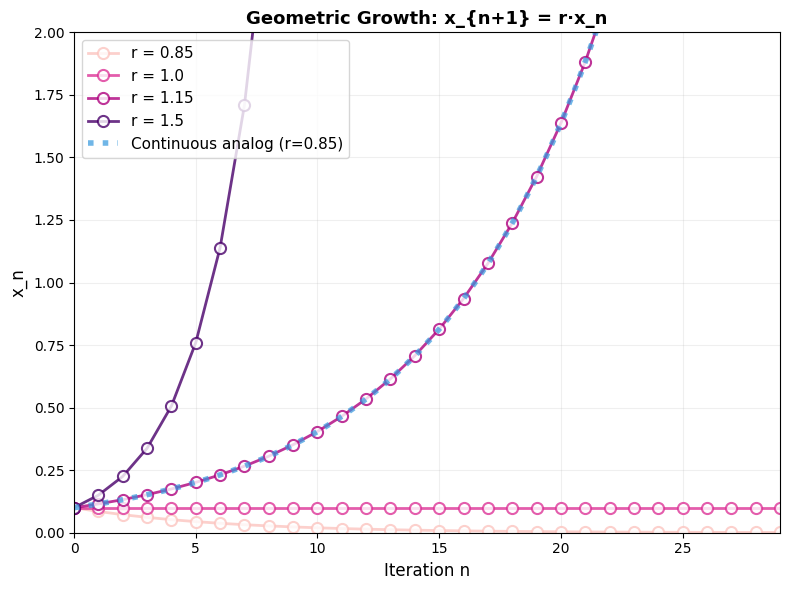

In [3]:
# ================================================================
# CELL 2: Geometric growth without feedback
# =================================================================

def geometric_map(x, r):
    """
    Single iteration of the geometric map.
    
    x_{n+1} = r * x_n
    
    Parameters:
    -----------
    x : float
        Current state
    r : float
        Growth rate parameter
    
    Returns:
    --------
    float : next state x_{n+1}
    """
    return r * x

x0 = 0.1
r_values = [0.85, 1.0, 1.15, 1.5]
n_iterations = 30

fig, ax = plt.subplots(figsize=(8, 6))

colors = ['#FCC5C0', '#DD3497', '#AE017E', '#49006A']

for r, color in zip(r_values, colors):
    trajectory = np.zeros(n_iterations)
    trajectory[0] = x0
    
    for i in range(1, n_iterations):
        trajectory[i] = geometric_map(trajectory[i-1], r)
    
    time_steps = np.arange(n_iterations)
    
    # Plot trajectory
    ax.plot(time_steps, trajectory, linewidth=2, marker='o', markersize=8,
            markerfacecolor='white', markeredgecolor=color, markeredgewidth=1.5,
            color=color, alpha=0.8, label=f'r = {r}')

# Overlay exponential function for r=1.15 case
x_exponential = np.linspace(0, n_iterations-1, 200)
y_exponential = x0 * (1.15 ** x_exponential)
ax.plot(x_exponential, y_exponential, color='#3497DD', linestyle=':', linewidth=4, 
        alpha=0.7, label='Continuous analog (r=0.85)')

ax.set_xlabel('Iteration n', fontsize=12)
ax.set_ylabel('x_n', fontsize=12)
ax.set_title('Geometric Growth: x_{n+1} = r·x_n', 
             fontsize=13, fontweight='bold')
ax.legend(fontsize=11, loc='upper left')
ax.grid(True, alpha=0.2)
ax.set_xlim(0, n_iterations - 1)
ax.set_ylim(0, 2)

plt.tight_layout()
plt.show()



All curves start from the same initial value, but the qualitative behaviour does not depend on the starting value. The behaviour of stepwise iteration in this model depends on the _growth factor_, $r$.

-  $r < 1$:  Exponential decay toward zero
-  $r = 1$:  Constant (every iteration gives the same value)
-  $r > 1$:  Exponential growth without bound

This behaviour of the iterated geometric _map_ at its discrete values is perfectly approximated by an exponential equation _function_, which is continuous. It has the factor $r$ as its basis, and $x$ as the exponent.

$$y = x_0 \cdot r^x$$

The behaviour of the geometric map is smooth and entirely predictable.


## The "Logistic Map"

Now let's turn to the actual logistic map and add the self-limiting feedback term to the equation. We set up the functions for one value the map, and for iterating it many times in the next cell. Then we explore the behaviour in the next cell after it.



In [4]:
# ================================================================
# CELL 3: Logistic Map function
# ================================================================
# The logistic map:
# 
# x_{n+1} = r * x_n * (1 - x_n)
#

def logistic_map(x, r):
    """
    Compute one iteration of the modified logistic map.
    
    Parameters:
    -----------
    x : float
        Current state
    r : float
        Growth rate parameter
    
    Returns:
    --------
    float : next state x_{n+1}
    """
    return r * x * (1 - x)


def iterate_map(x0, r, n_iterations=1000, n_discard=300):
    """
    Iterate the map and return time series after transient behavior.
    
    Parameters:
    -----------
    x0 : float
        Initial condition
    r : float
        Growth rate
    n_iterations : int
        Total iterations to compute
    n_discard : int
        Number of initial iterations to discard (omit transient behaviour)
    
    Returns:
    --------
    np.array : time series of length (n_iterations - n_discard)
    """
    trajectory = np.zeros(n_iterations)
    trajectory[0] = x0
    
    for i in range(1, n_iterations):
        trajectory[i] = logistic_map(trajectory[i-1], r)
    
    return trajectory[n_discard:]



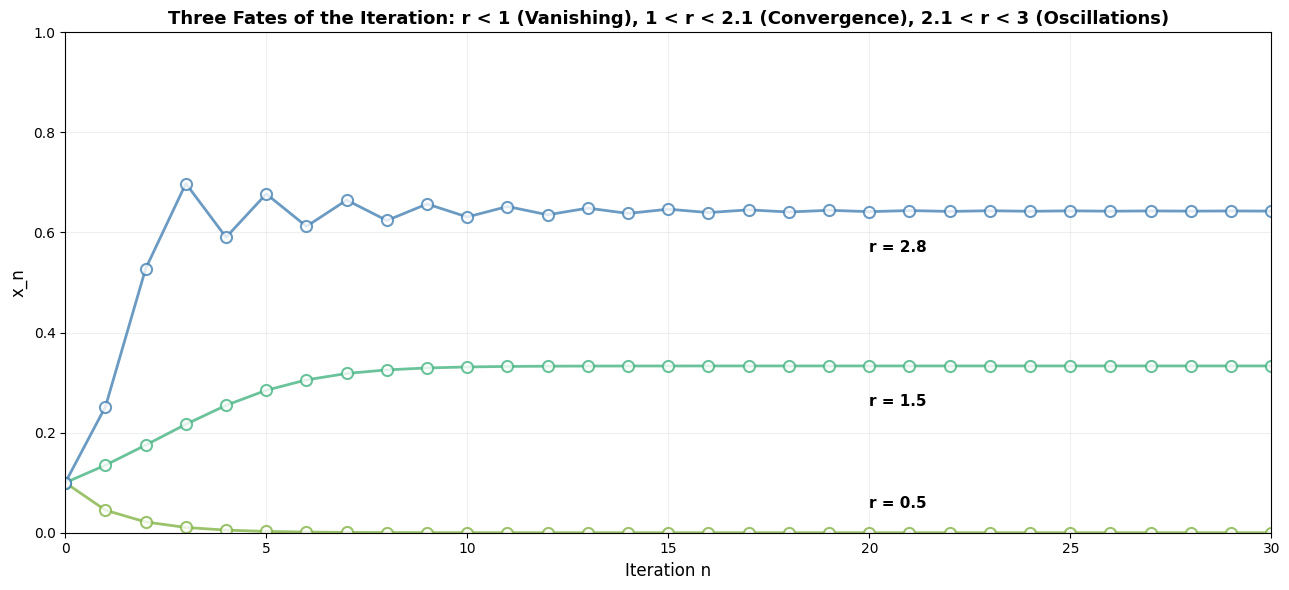

In [5]:
# =================================================================
# CELL 4: Three trajectories showing different regimes
# =================================================================
# Compare three r values: vanishing, convergence, and transient dynamics

x0 = 0.1
r_values = [0.5, 1.5, 2.8]
n_iterations = 31
label_step = 20

fig, ax = plt.subplots(figsize=(13, 6))

colors = ['#82b446', '#46b482', '#4682b4']
y_offset_text = [0.05, -0.08, -0.08]  # Vertical offset for text labels

for r, color, y_offset in zip(r_values, colors, y_offset_text):
    trajectory = np.zeros(n_iterations)
    trajectory[0] = x0
    
    for i in range(1, n_iterations):
        trajectory[i] = logistic_map(trajectory[i-1], r)
    
    time_steps = np.arange(n_iterations)
    
    # Plot trajectory
    ax.plot(time_steps, trajectory, linewidth=2, marker='o', markersize=8,
        markerfacecolor='white', markeredgecolor=color, markeredgewidth=1.5,
        color=color, alpha=0.8, label=f'r = {r}')
    
    # Add text label
    ax.text(label_step, trajectory[label_step] + y_offset, f'r = {r}', 
            fontsize=11, fontweight='bold', color='#000000')

ax.set_xlabel('Iteration n', fontsize=12)
ax.set_ylabel('x_n', fontsize=12)
ax.set_title('Three Fates of the Iteration: r < 1 (Vanishing), 1 < r < 2.1 (Convergence), 2.1 < r < 3 (Oscillations)', 
             fontsize=13, fontweight='bold')
ax.grid(True, alpha=0.2)
ax.set_xlim(0, n_iterations - 1)
ax.set_ylim(0, 1)

plt.tight_layout()
plt.show()


The growth is no longer unbounded, but converges to a fixed point.


Three different regimes appear:

-  $r = 0.5$:  $x$ values vanish (x → 0). Stable, but empty.
-  $r = 1.5$:  $x$ values converges to a fixed point. Stability is achieved.
-  $r = 2.8$:  $x$ values converge after transient oscillations around a fixed point. Still stable.

Note: even though $r$ promotes growth, the system is self-limiting (the effect of $(1-x)$ term).


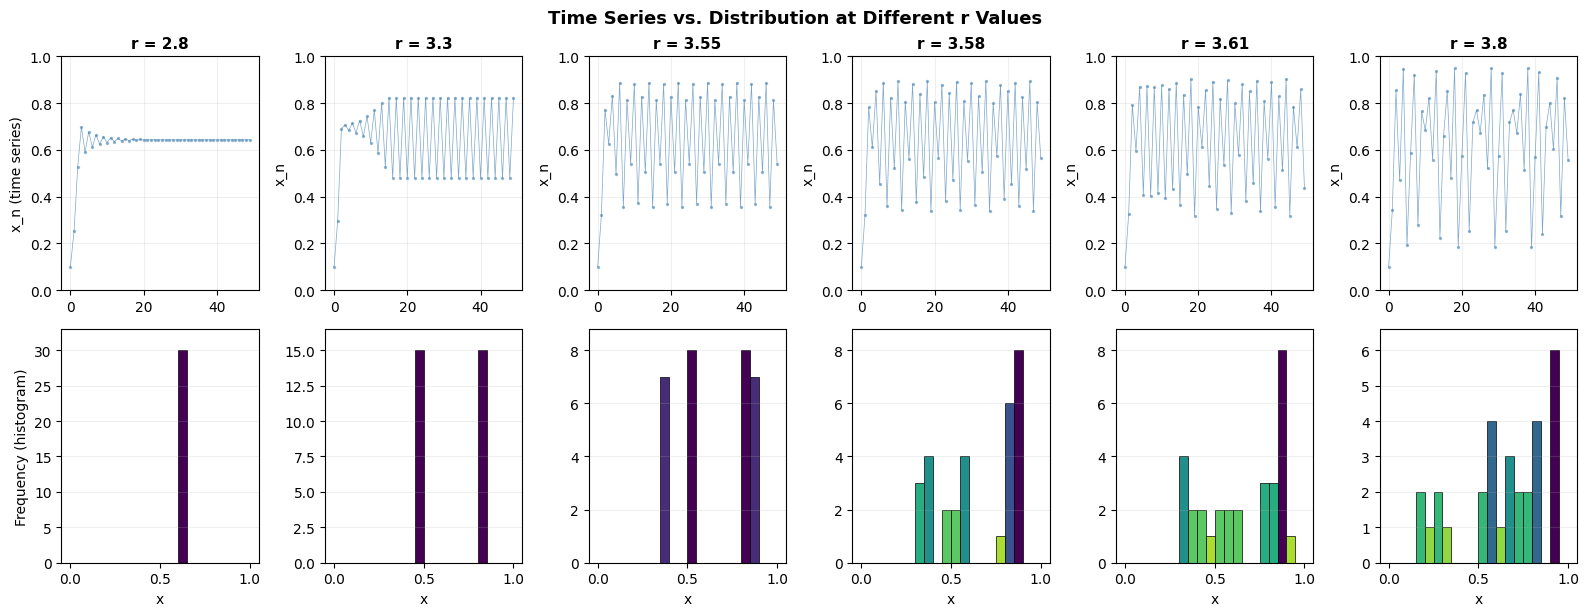

In [6]:
# =================================================================
# CELL 5: Explore larger values of r
# =================================================================
# Let's watch what happens at larger r values

x0 = 0.1
r_values = [2.8, 3.3, 3.55, 3.58, 3.61, 3.8]
n_iterations = 50


# Create a figure with 2 columns per r value
fig, axes = plt.subplots(2, len(r_values), figsize=(16, 6))

for idx, r in enumerate(r_values):
    # Compute trajectory
    trajectory = iterate_map(x0, r, n_iterations=n_iterations, n_discard=0)
    
    # LEFT: Time series plot
    ax_ts = axes[0, idx]
    time_steps = np.arange(len(trajectory))
    ax_ts.plot(time_steps, trajectory, linewidth=0.5, color='steelblue', alpha=0.7)
    ax_ts.scatter(time_steps, trajectory, s=2, color='steelblue', alpha=0.5)
    ax_ts.set_ylabel('x_n')
    ax_ts.set_title(f'r = {r}', fontsize=11, fontweight='bold')
    ax_ts.set_ylim(0, 1)
    ax_ts.grid(True, alpha=0.2)
    if idx == 0:
        ax_ts.set_ylabel('x_n (time series)', fontsize=10)
    
    # RIGHT: Histogram (inverted viridis: high density = dark)
    ax_hist = axes[1, idx]
    counts, bins, patches = ax_hist.hist(trajectory[20:], bins=np.linspace(0, 1, 21), orientation='vertical', 
                                         color='steelblue', edgecolor='black', linewidth=0.5)
    
    # Color bars by count (inverted viridis: more visits = darker)
    if np.max(counts) > 0:
        norm_counts = counts / np.max(counts)
        cmap = plt.cm.viridis_r  # Reversed: high=dark, low=white
        for patch, count in zip(patches, counts):
            if count > 0:
                patch.set_facecolor(cmap(count / np.max(counts)))
    
    ax_hist.set_xlabel('x')
    ax_hist.set_ylim(0, np.max(counts) * 1.1)
    ax_hist.grid(True, alpha=0.2, axis='y')
    if idx == 0:
        ax_hist.set_ylabel('Frequency (histogram)', fontsize=10)

plt.tight_layout()
plt.suptitle('Time Series vs. Distribution at Different r Values\n',
             fontsize=13, fontweight='bold', y=1.02)
plt.show()


The individual trajectories are plotted in the top row. The bottom row shows histograms of the `x`-values that the trajectory visits. Dark, tall bins represent ranges in which `x`-values fall often. Light-green or yellow bins represent ranges of $x$ that are visited only rarely.

Observations:

- At $r=2.9$: the trajectory converges to a single point (fixed point)
- At $r=3.3$: it oscillates between 2 values (period-2 orbit)
- At $r=3.53$: it oscillates between 4 values (period-4 orbit)
- As $r$ increases further: more periods appear, then the behaviour turns chaotic ($r~3.57+$) and $x$ is no longer confined to narrow, discrete regions.


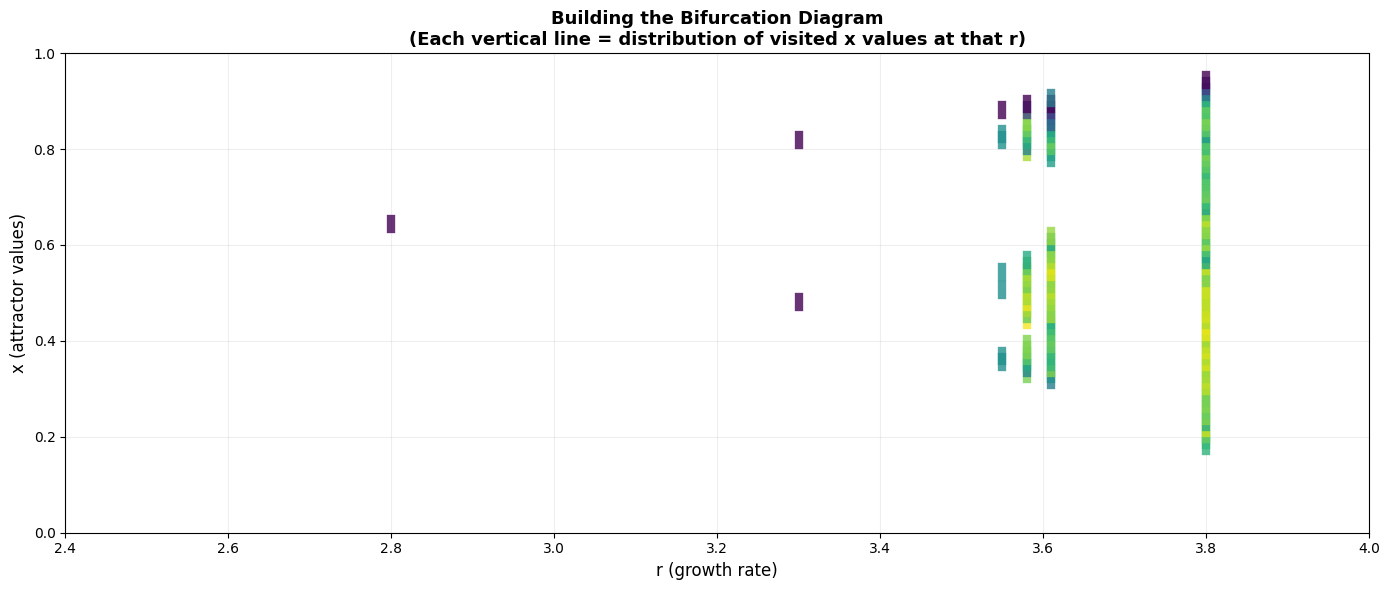

In [7]:
# =================================================================
# CELL 6: Build the bifurcation diagram step by step
# =================================================================
# Plot trajectories as vertical line segments, colored by density
# This is the key insight: the bifurcation diagram is like a colored histogram viewed from the top

x0 = 0.1
n_iterations = 1000
n_discard = 300

fig, ax = plt.subplots(figsize=(14, 6))

for r in r_values:
    trajectory = iterate_map(x0, r, n_iterations=n_iterations, n_discard=n_discard)
    
    # Create histogram to get density
    counts, bins = np.histogram(trajectory, bins=80, range=(0, 1))
    bin_centers = (bins[:-1] + bins[1:]) / 2
    
    # For each bin center, plot a vertical line segment colored by density
    cmap = plt.cm.viridis_r  # Reversed
    norm_counts = counts / np.max(counts) if np.max(counts) > 0 else counts
    
    for x_val, density in zip(bin_centers, norm_counts):
        if density > 0:
            color = cmap(density)
            ax.plot([r, r], [x_val - 0.01, x_val + 0.01], color=color, linewidth=6, alpha=0.8)

ax.set_xlabel('r (growth rate)', fontsize=12)
ax.set_ylabel('x (attractor values)', fontsize=12)
ax.set_title('Building the Bifurcation Diagram\n' + 
             '(Each vertical line = distribution of visited x values at that r)',
             fontsize=13, fontweight='bold')
ax.set_xlim(2.4, 4.0)
ax.set_ylim(0, 1)
ax.grid(True, alpha=0.2)

plt.tight_layout()
plt.show()



In this plot we are taking exactly the same six histograms we plotted above, we look at them from the top, we rotate them vertically, and we place them at the $r$ value where we computed them. This is the essence of the _bifurcation plot_ below. We do exactly the same thing, but for a thousand histograms or more, stacked densely side by side to cover all the $r$ values we are interested in.


Computing Map:   0%|                                                                                          …

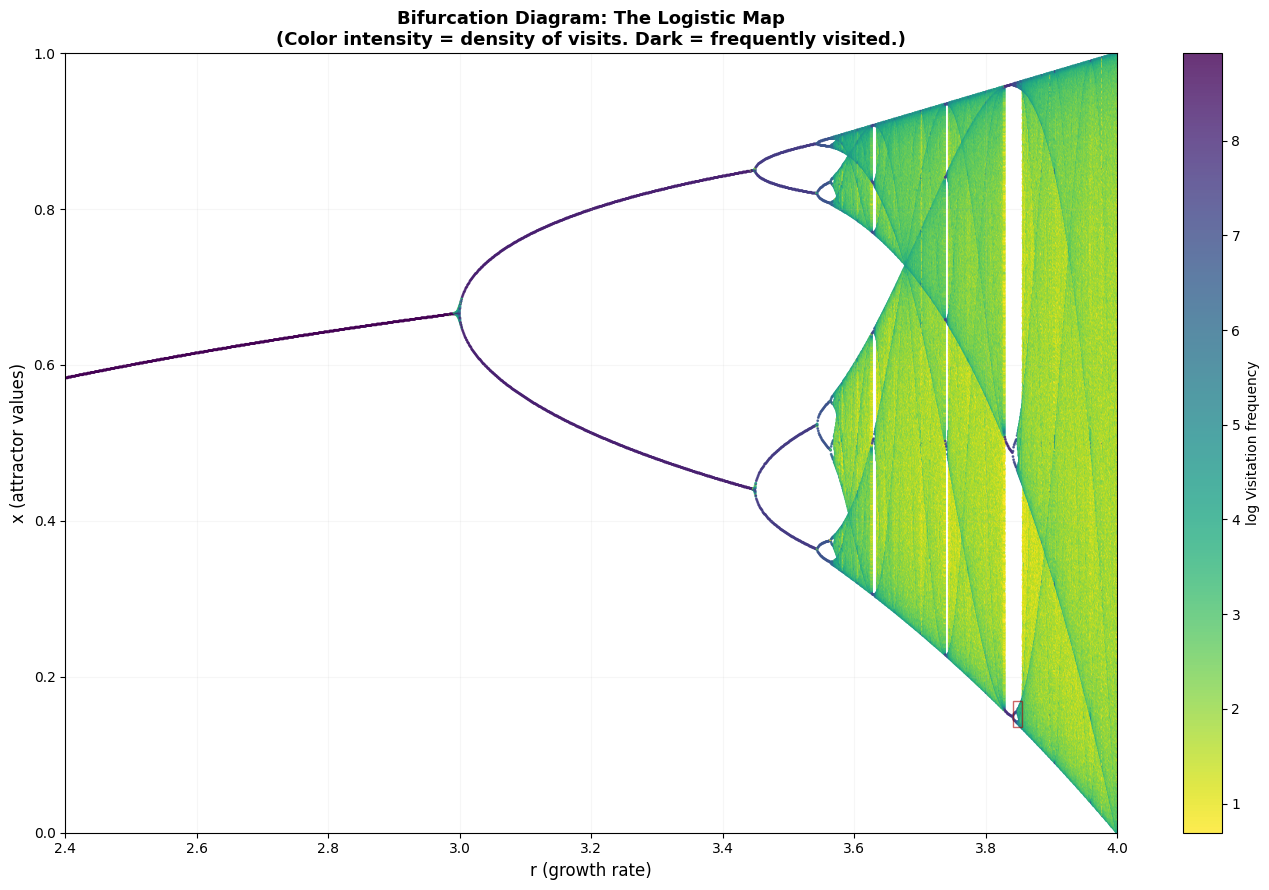

In [8]:
# =================================================================
# CELL 7: Full bifurcation diagram at good resolution
# =================================================================
# Now we compute the full diagram at higher resolution

r_range = np.linspace(2.4, 4.0, 1800)
x0 = 0.1
n_iterations = 8000
n_discard = 500

zoom_r_min = 3.841    # A window for later magnification
zoom_r_max = 3.855
zoom_x_min = 0.135
zoom_x_max = 0.169

bifurcation_data = [] # Initialize array to store density information

for r in tqdm(r_range, desc = "Computing Map", ncols=800):
    trajectory = iterate_map(x0, r, n_iterations=n_iterations, n_discard=n_discard)
    
    # Create histogram
    counts, bins = np.histogram(trajectory, bins=1000, range=(0, 1))
    bin_centers = (bins[:-1] + bins[1:]) / 2
    
    for x_val, count in zip(bin_centers, counts):
        if count > 0:
            bifurcation_data.append((r, x_val, np.log(count + 1)))

bifurcation_data = np.array(bifurcation_data)

# Plot as scatter with density coloring
fig, ax = plt.subplots(figsize=(14, 9))

scatter = ax.scatter(bifurcation_data[:, 0], bifurcation_data[:, 1], 
                     c=bifurcation_data[:, 2], cmap='viridis_r', 
                     s=1, alpha=0.8)
# Add zoom rectangle
rect = Rectangle((zoom_r_min, zoom_x_min), 
                 zoom_r_max - zoom_r_min, 
                 zoom_x_max - zoom_x_min,
                 linewidth=1, edgecolor='#aa0000', facecolor='none', 
                 linestyle='-', alpha=0.6)
ax.add_patch(rect)

ax.set_xlabel('r (growth rate)', fontsize=12)
ax.set_ylabel('x (attractor values)', fontsize=12)
ax.set_title('Bifurcation Diagram: The Logistic Map\n' +
             '(Color intensity = density of visits. Dark = frequently visited.)',
             fontsize=13, fontweight='bold')
ax.set_xlim(2.4, 4.0)
ax.set_ylim(0, 1)

cbar = plt.colorbar(scatter, ax=ax, label='log Visitation frequency')
ax.grid(True, alpha=0.1)

plt.tight_layout()
plt.show()


This is the entire logistic map, at high resolution. (At least up to $r=4.0$ at higher values of $r$, the $x$ values quickly grow exponentially.) you see the region that had x converge to single values on the left, more complex behaviour on the right.

Key features to observe:
- $r < 3$: trajectory converges to a fixed point (single horizontal line)
- $r ≈ 3$: bifurcation to period-2 (splits into two lines)
- $r ≈ 3.44$: period-doubling cascade (4 lines, then 8, then 16...)
- $r ≈ 3.57$: onset of chaos (dense regions)
- Periodically, islands of order within the chaos reappear.

**Did you notice the rectangle?**

I placed a tiny, red rectangle at the right end of the lower limb. In the next plot we magnify this region and recompute the map within the bounds of this tiny rectangle, to see what the structure of the plot looks like at higher magnification ...



In [ ]:
# ==================
# CELL 8: Zooming in
# ==================

# This zoom computes the map ONLY in the magnified region specified below
# You can adjust these values to re-plot a different magnification window

zoom_r_min   = 3.841   # These are the same coordinates as in the cell above.
zoom_r_max   = 3.855   # I am just repeating them here so it is convenient
zoom_x_min   = 0.135   # to edit them if you would like to zoom even deeper 
zoom_x_max   = 0.169   # into a different region of the map.
n_iterations = 12000

r_range_zoom = np.linspace(zoom_r_min, zoom_r_max, 1800)
x0 = 0.1

bifurcation_data_zoom = [] # Initialize array density information for zoom region

for r in tqdm(r_range_zoom, desc="Computing Magnified Map", ncols=800):
    trajectory = iterate_map(x0, r, n_iterations=n_iterations, n_discard=n_discard)
    
    # Create histogram
    counts, bins = np.histogram(trajectory, bins=1000, range=(zoom_x_min, zoom_x_max))
    bin_centers = (bins[:-1] + bins[1:]) / 2
    
    for x_val, count in zip(bin_centers, counts):
        if count > 0:
            bifurcation_data_zoom.append((r, x_val, np.log(count + 1)))

bifurcation_data_zoom = np.array(bifurcation_data_zoom)

# Plot magnified region
fig, ax = plt.subplots(figsize=(14, 9))

scatter = ax.scatter(bifurcation_data_zoom[:, 0], bifurcation_data_zoom[:, 1], 
                     c=bifurcation_data_zoom[:, 2], cmap='viridis_r', 
                     s=2, alpha=0.8)

ax.set_xlabel('r (growth rate)', fontsize=12)
ax.set_ylabel('x (attractor values)', fontsize=12)
ax.set_title(f'Magnified Bifurcation Diagram: Self-Similar Structure\n' +
             f'(r ∈ [{zoom_r_min:.3f}, {zoom_r_max:.3f}], x ∈ [{zoom_x_min:.3f}, {zoom_x_max:.3f}])',
             fontsize=13, fontweight='bold')
ax.set_xlim(zoom_r_min, zoom_r_max)
ax.set_ylim(zoom_x_min, zoom_x_max)

cbar = plt.colorbar(scatter, ax=ax, label='log Visitation frequency')
ax.grid(True, alpha=0.1)

plt.tight_layout()
plt.show()



Note the scale of the $r$- and $x$ axes. They are each almost a hundred-fold smaller than the original plot. **Yet the overall structure of the plot re-appears here!** We have cascades within cascades of period doubling, we have again chaotic regions, bounded with islands of stability, even the general shape of the bifurcations is repeated. Such complexity at every scale is called _self-similar_, and it is a hallmark of fractal structures.

You can magnify again by defining a new zoom region within this plot! Just uncomment the coordinates at the top of the cell, enter your new values, and recompute. You may need to increase `n_iterations`, because the values on the y-axis always span the whole interval, and the actual observations within the window get thinned out as we magnify. If you find remarkable regions, share the coordinates in collaboration document!

We next need to ask: what actually causes these dynamics? How do we interpret the mathematical relation, that makes this trajectory so different from a simple exponential function?


## The Continuous Logistic Equation

We've seen the rich, chaotic dynamics of the discrete logistic map. But what about the continuous analog?

The continuous function is an _ordinary differential equation_ (ODE). This **logistic ODE** is defined as:

$$\frac{dx}{dt} = r \cdot x \cdot (1 - x)$$

And it has an analytical solution:

$$x(t) = \frac{x_0 \cdot e^{rt}}{1 - x_0 + x_0 \cdot e^{rt}}$$

With $x$ and $r$ the same as above, and $t$ being _time_.

So, just like in our very first plot, we can compare the continuous function to the discrete map:



In [ ]:
# =================================================================
# FINAL CELL: The Continuous Logistic Equation
# =================================================================

from scipy.integrate import solve_ivp

def logistic_ode(t, x, r):
    """
    The continuous logistic differential equation.
    
    dx/dt = r·x·(1 - x)
    """
    return r * x[0] * (1 - x[0])

def logistic_ode_analytical(t, x0, r):
    """
    Analytical solution to the logistic ODE.
    
    x(t) = x₀·exp(r·t) / (1 - x₀ + x₀·exp(r·t))
    """
    exp_rt = np.exp(r * t)
    return (x0 * exp_rt) / (1 - x0 + x0 * exp_rt)

# Parameters
x0 = 0.1
r_values = [2.0, 2.8, 3.5, 3.8]
t_max = 40
t_eval = np.linspace(0, t_max, 500)

fig, axes = plt.subplots(2, 2, figsize=(14, 8))
axes = axes.flatten()

colors = ['#ABDDA4', '#66C2A5', '#3288BD', '#5E4FA2']


for idx, (r, color) in enumerate(zip(r_values, colors)):
    ax = axes[idx]
    
    # Continuous ODE solution (analytical)
    x_continuous = logistic_ode_analytical(t_eval, x0, r-1) * ((r-1)/r)
    
    # Discrete map trajectory
    n_iterations = t_max + 1
    trajectory_discrete = np.zeros(n_iterations)
    trajectory_discrete[0] = x0
    for i in range(1, n_iterations):
        trajectory_discrete[i] = logistic_map(trajectory_discrete[i-1], r)
    time_discrete = np.arange(n_iterations)
    
    # Plot continuous
    ax.plot(t_eval, x_continuous, linewidth=2.5, color='#9E0142', alpha=0.8, 
            label='Continuous (ODE)')
    
    # Plot discrete
    ax.plot(time_discrete, trajectory_discrete, linewidth=1.5, 
            marker='o', markersize=5, markerfacecolor='white', 
            markeredgecolor=color, markeredgewidth=1.5,
            color=color, alpha=0.7, linestyle='-', label='Discrete (map)')
    
    ax.set_xlabel('Time / Iteration', fontsize=11)
    ax.set_ylabel('x(t) / x_n', fontsize=11)
    ax.set_title(f'r = {r}', fontsize=12, fontweight='bold')
    ax.legend(fontsize=9, loc='best')
    ax.grid(True, alpha=0.2)
    ax.set_xlim(0, t_max)
    ax.set_ylim(0, 1.1)

plt.suptitle('Continuous vs. Discrete: The Logistic Equation', 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()




**The CONTINUOUS logistic equation (ODE) always converges smoothly at any $r$!**

The DISCRETE logistic map shows:

-  $r=1.5$: smooth convergence (like the ODE)
-  $r=2.8$: oscillatory convergence
-  $r=3.5$: period-doubling, complex dynamics
-  $r=3.8$: CHAOS (which the ODE never exhibits!)


---

# The Deep Question:

-  Are we not computing the same thing?
-  Why does discretization change the map so dramatically and ultimately give rise to such deeply rich behaviour at all scales?
-  What is fundamentally different about taking discrete steps versus flowing continuously through time?

**Please post your comment into the "Logistic Map" document in the Collaboration folder before class.**






That is all.
